In [101]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#import ggplot as ggplot
from plotnine.data import economics

In [18]:
# Raw data file
file_to_load = "Resources/profiles_revised_Mar_29.csv"

# Read purchasing file and store into pandas data frame
df= pd.read_csv(file_to_load)
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn't matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [24]:
 df.dropna(inplace=True)

In [26]:
df.describe()

,age,height,income
count,7127.000000,7127.000000,7127.000000
mean,33.654272,68.126140,30141.029044
std,11.136878,3.987132,114992.129845
min,17.000000,43.000000,-1.000000
25%,25.000000,65.000000,-1.000000
50%,31.000000,68.000000,-1.000000
75%,40.000000,71.000000,20000.000000
max,70.000000,95.000000,1000000.000000


In [54]:
total_nrows = df.shape[0] 
total_ncols = df.shape[1]
print('Total rows: ', total_nrows, ' Total columns: ', total_ncols)
print(df.info())

Total rows:  7127  Total columns:  19
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7127 entries, 0 to 59944
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7127 non-null   int64  
 1   body_type    7127 non-null   object 
 2   diet         7127 non-null   object 
 3   drinks       7127 non-null   object 
 4   drugs        7127 non-null   object 
 5   education    7127 non-null   object 
 6   ethnicity    7127 non-null   object 
 7   height       7127 non-null   float64
 8   income       7127 non-null   int64  
 9   job          7127 non-null   object 
 10  offspring    7127 non-null   object 
 11  orientation  7127 non-null   object 
 12  pets         7127 non-null   object 
 13  religion     7127 non-null   object 
 14  sex          7127 non-null   object 
 15  sign         7127 non-null   object 
 16  smokes       7127 non-null   object 
 17  speaks       7127 non-null   object 
 18  status   

In [58]:
df1 = df.dropna(subset=['diet', 'drugs','education','age','status','sex','orientation','body_type',
'ethnicity','job','pets'])

In [59]:
 def rmissingvaluecol(df1,threshold):
    l = []
    l = list(df1.drop(df1.loc[:,list((100*(df1.isnull().sum()/len(df1.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(df1.shape[1] - len(l)))
    print("Columns:\n",list(set(list((df1.columns.values))) - set(l)))
    return l

In [62]:
l = rmissingvaluecol(df1,1)
df2 = df1[l]
df2.head()

# Columns having more than 1 percent missing values: 0
Columns:
 []


C:\Users\sarma\AppData\Local\Temp/ipykernel_1660/174281756.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
7,30,average,mostly anything,socially,never,graduated from college/university,white,65.0,-1,artistic / musical / writer,"doesn't have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
14,29,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000,other,"doesn't have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single
19,34,athletic,mostly anything,socially,never,graduated from masters program,white,72.0,-1,science / tech / engineering,doesn't have kids,straight,likes dogs and likes cats,catholicism but not too serious about it,m,pisces and it's fun to think about,no,english (fluently),single


<Figure size 1080x504 with 0 Axes>

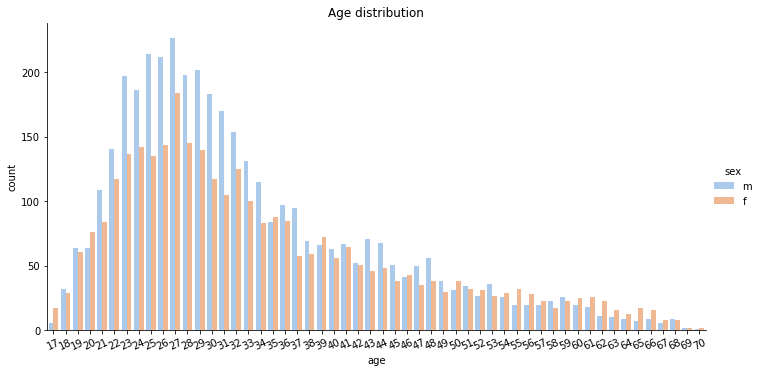

In [66]:
# sns.countplot(y = 'age', data = my_data)
plt.figure(figsize=(15, 7))
sns.catplot(x='age', data = df1, kind='count', palette='pastel', hue='sex', 
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.show()

In [68]:
#Orientation in percentage
def show_percetage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

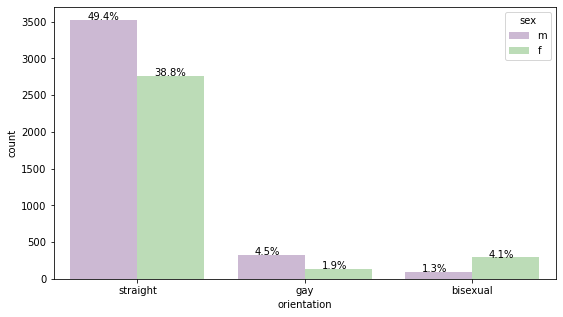

In [73]:
# Orientation (in percentage) of male and females. Represent using a suitable graph
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='orientation', data=df1,
hue='sex',
palette='PRGn',
order=df1['orientation'].value_counts().iloc[:10].index)
total = float(len(df1))
show_percetage(ax, df1)
plt.show()

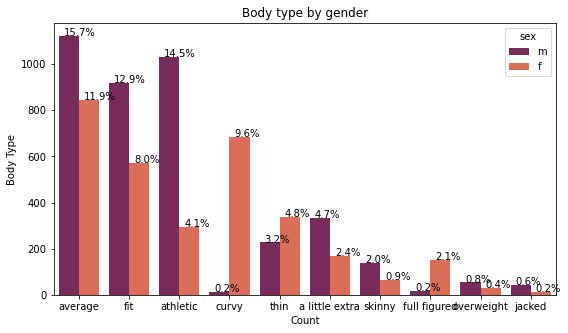

In [74]:
#Body type plot
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='body_type', data=df1,
hue='sex',
palette='rocket',
order=df1['body_type'].value_counts().iloc[:10].index)
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type')
show_percetage(ax, df1)
plt.show()

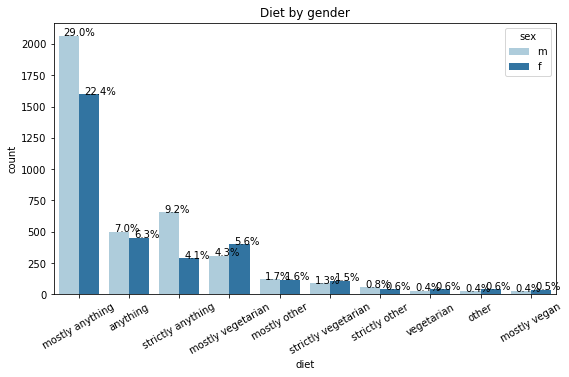

In [76]:
#Different diets by gender. Represent using suitable graph
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='diet', data=df1,
hue='sex', palette='Paired',
order = df1['diet'].value_counts().iloc[:10].index)
plt.xticks(rotation = 30)
ax.set_title("Diet by gender")
show_percetage(ax, df1)

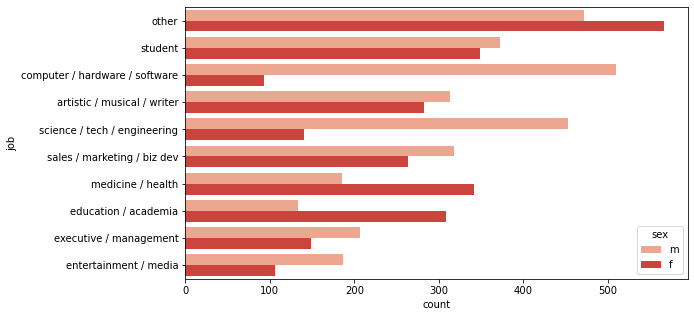

In [77]:
# Compare jobs of males and females. Represent using suitable graphs
plt.figure(figsize=(9, 5))
sns.countplot(y='job', data=df1,
hue='sex', palette='Reds',
order = df1['job'].value_counts().iloc[:10].index)
plt.show()


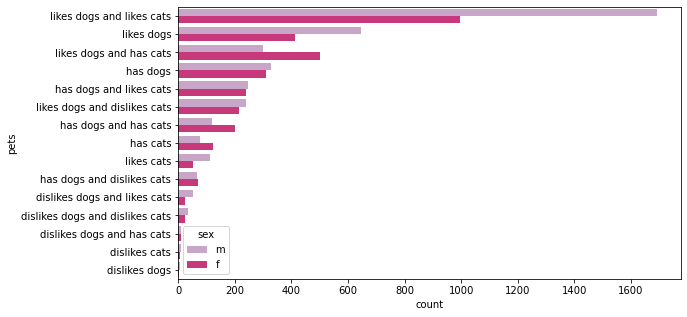

In [78]:
#Compare pets of different gender. Represent using suitable graphs
plt.figure(figsize=(9, 5))
sns.countplot(y = 'pets', data=df1,
hue='sex', palette='PuRd',
order=df1['pets'].value_counts().iloc[:].index)
plt.show()

In [111]:
list(df.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'height',
 'income',
 'job',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [112]:
print("nnumber of catogries : ",df.sign.nunique())

nnumber of catogries :  48


In [113]:
print("Catogries : ",df.sign.unique())

Catogries :  ['gemini' 'cancer' 'sagittarius' 'taurus'
 "pisces and it's fun to think about" "sagittarius but it doesn't matter"
 "cancer and it's fun to think about"
 "aquarius and it's fun to think about" "taurus but it doesn't matter"
 'libra' 'pisces' "aries but it doesn't matter"
 "capricorn and it's fun to think about" "gemini but it doesn't matter"
 "sagittarius and it's fun to think about"
 "libra and it's fun to think about" "gemini and it's fun to think about"
 "virgo but it doesn't matter" 'cancer and it matters a lot'
 "aries and it's fun to think about" "leo and it's fun to think about"
 'aquarius' 'leo' "virgo and it's fun to think about"
 "scorpio and it's fun to think about" 'aries and it matters a lot'
 "pisces but it doesn't matter" "cancer but it doesn't matter"
 "taurus and it's fun to think about" "leo but it doesn't matter"
 "aquarius but it doesn't matter" "libra but it doesn't matter"
 'capricorn' "capricorn but it doesn't matter"
 "scorpio but it doesn't matter

In [114]:
df.sign

0                                         gemini
1                                         cancer
7                                    sagittarius
14                                        taurus
19            pisces and it's fun to think about
22             sagittarius but it doesn't matter
36            cancer and it's fun to think about
44          aquarius and it's fun to think about
49                  taurus but it doesn't matter
72            pisces and it's fun to think about
94                                         libra
98                                        pisces
105                  aries but it doesn't matter
106                  aries but it doesn't matter
113        capricorn and it's fun to think about
121                 gemini but it doesn't matter
123      sagittarius and it's fun to think about
137                                        libra
141            libra and it's fun to think about
167           gemini and it's fun to think about
168            sagit

In [115]:
df.sign.str.split()

0                                               [gemini]
1                                               [cancer]
7                                          [sagittarius]
14                                              [taurus]
19            [pisces, and, it's, fun, to, think, about]
22               [sagittarius, but, it, doesn't, matter]
36            [cancer, and, it's, fun, to, think, about]
44          [aquarius, and, it's, fun, to, think, about]
49                    [taurus, but, it, doesn't, matter]
72            [pisces, and, it's, fun, to, think, about]
94                                               [libra]
98                                              [pisces]
105                    [aries, but, it, doesn't, matter]
106                    [aries, but, it, doesn't, matter]
113        [capricorn, and, it's, fun, to, think, about]
121                   [gemini, but, it, doesn't, matter]
123      [sagittarius, and, it's, fun, to, think, about]
137                            

In [116]:
df['signcleaned'] = df.sign.str.split().str.get(0)

In [117]:
df['signcleaned'].tail()

59904    cancer
59907    taurus
59913     libra
59942       leo
59944       leo
Name: signcleaned, dtype: object

In [118]:
print("catogries : ",  list(df.signcleaned.unique()))

catogries :  ['gemini', 'cancer', 'sagittarius', 'taurus', 'pisces', 'aquarius', 'libra', 'aries', 'capricorn', 'virgo', 'leo', 'scorpio']


In [120]:
df.signcleaned.value_counts()

gemini         659
cancer         651
leo            651
virgo          628
libra          587
scorpio        586
sagittarius    583
aries          582
taurus         578
pisces         566
aquarius       531
capricorn      525
Name: signcleaned, dtype: int64

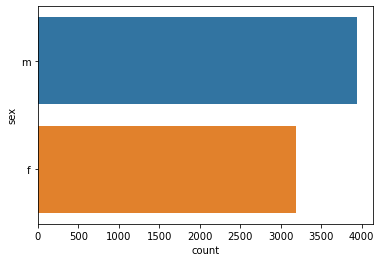

In [122]:
#Males and females in Data
sns.countplot(data=df, y="sex");

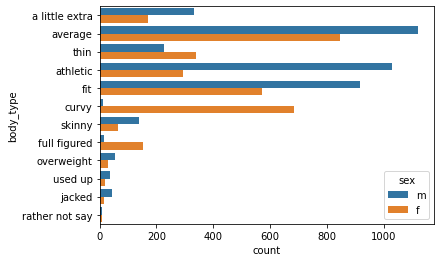

In [124]:
#body type by Gender
sns.countplot(data=df, y="body_type", hue = "sex");

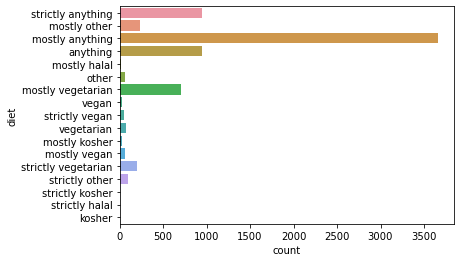

In [126]:
#chart of the dietary information for users
sns.countplot(data=df, y="diet");

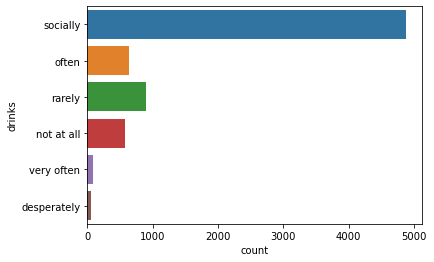

In [128]:
#plot shows that the majority of the users drink "socially", then "rarely" and "often"
sns.countplot(data=df, y="drinks");

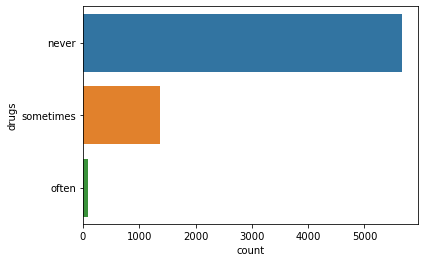

In [130]:
#Drugs users
sns.countplot(data=df, y="drugs");

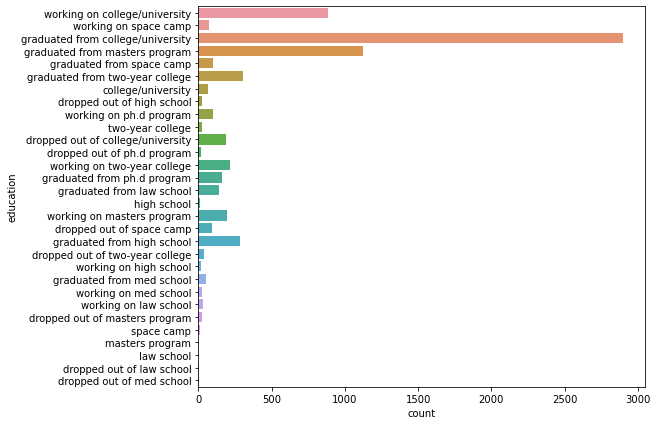

In [134]:
#Education level
plt.figure(figsize=(8,7))

sns.countplot(data=df, y="education");

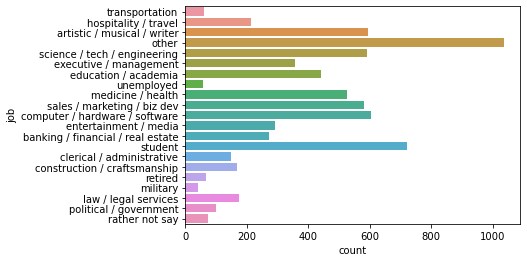

In [136]:
#Jobs(Most users don't fit into the categories provided)
sns.countplot(data=df, y="job");

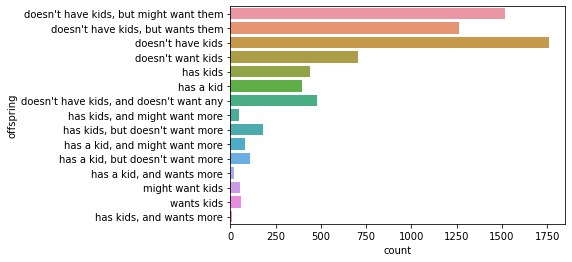

In [137]:
#users with kids
sns.countplot(data=df, y="offspring");

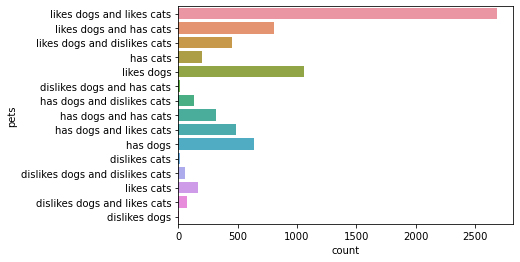

In [138]:
#Pets
sns.countplot(data=df, y="pets");

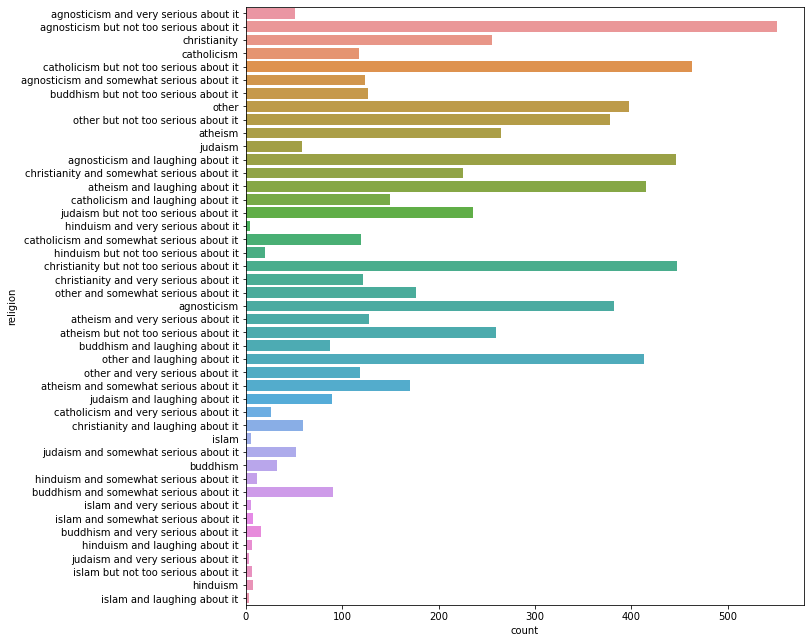

In [140]:
#Religion(Religion was similar to sign where there are a lot of qualifiers)
plt.figure(figsize=(10,11))
sns.countplot(data=df, y="religion");

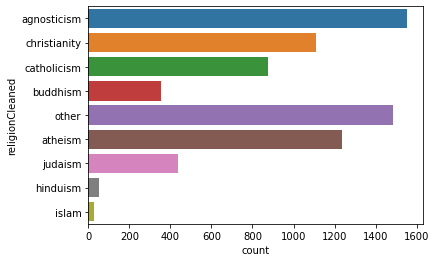

In [142]:
#religion was cleaned to take the first word and distilled down to 9 groups
df['religionCleaned'] = df.religion.str.split().str.get(0)
sns.countplot(data=df, y="religionCleaned");

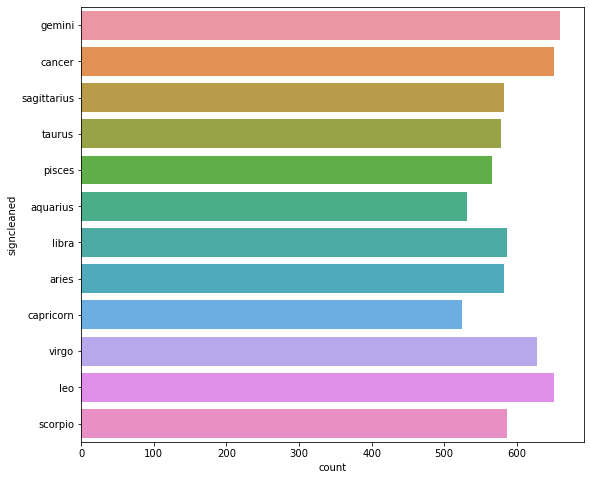

In [143]:
#Signs
plt.figure(figsize=(9,8))
sns.countplot(data=df, y="signcleaned");

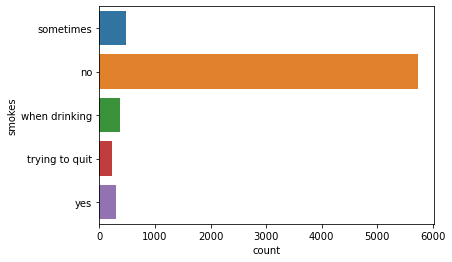

In [144]:
#Smoking
sns.countplot(data=df, y="smokes");

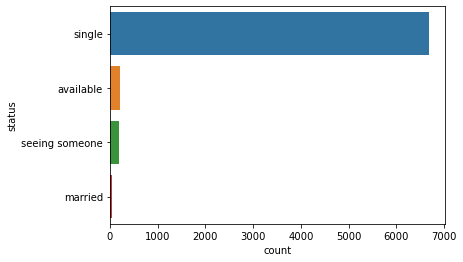

In [145]:
#Status
sns.countplot(data=df, y="status");